# Sesión 5 monitoría

## Merge y Concat en pandas

In [6]:
import pandas as pd
import numpy as np

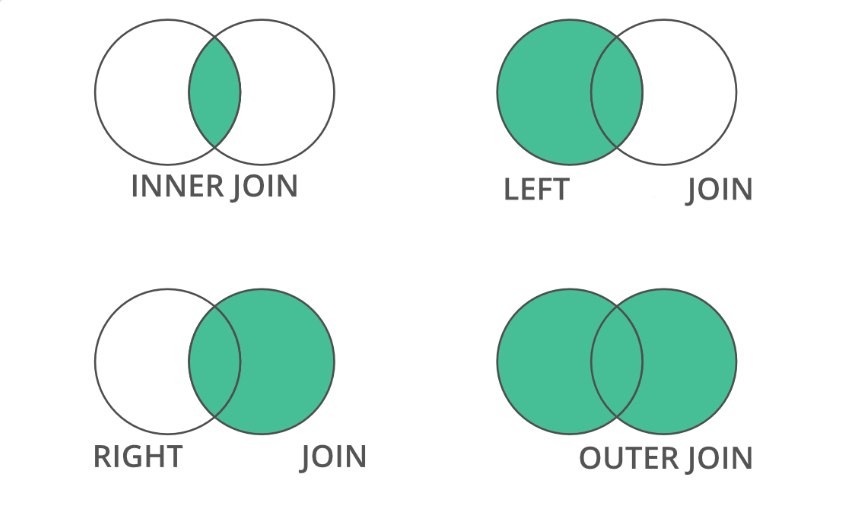

In [7]:
# ==== Datasets base ====
# Empleados y departamentos
empleados = pd.DataFrame({
    "empleado_id": [1, 2, 3, 4, 5, 5],
    "nombre": ["Ana", "Bruno", "Carla", "Diego", "Elena", "Elena_dup"],
    "dept_id": [10, 10, 20, 30, 30, 30]
})

departamentos = pd.DataFrame({
    "dept_id": [10, 20, 20, 40],
    "departamento": ["Ventas", "Finanzas", "Finanzas_dup", "TI"]
})

# Pedidos y clientes (para otras demostraciones)
clientes = pd.DataFrame({
    "cliente_id": [101, 102, 103],
    "cliente": ["ACME", "Globex", "Initech"]
})

pedidos = pd.DataFrame({
    "pedido_id": [1001, 1002, 1003, 1004],
    "cliente_id": [101, 101, 104, np.nan],
    "monto": [1200, 800, 500, 300]
})

# DataFrames con columnas distintas para concat
df_a = pd.DataFrame({"A": [1,2], "B": ["x","y"]})
df_b = pd.DataFrame({"B": ["y","z"], "C": [3,4]})

In [ ]:
#Desarrollo de la explicación

## Obtener datos de APIs abiertas

### Datos de la bolsa: alphavantage

In [1]:
import requests

url = "https://www.alphavantage.co/query"
params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "AAPL",
    "apikey": ""
}
r = requests.get(url, params=params).json()
df = pd.DataFrame(r["Time Series (Daily)"]).T
df.columns = ["open", "high", "low", "close", "volume"]
df.index = pd.to_datetime(df.index)
print(df.head())


                open      high       low     close    volume
2025-08-27  228.5100  230.9000  228.2950  230.4900  31200150
2025-08-26  226.8700  229.4900  224.6900  229.3100  54575107
2025-08-25  226.4800  229.3000  226.2300  227.1600  30983133
2025-08-22  226.1700  229.0900  225.4100  227.7600  42477811
2025-08-21  226.2700  226.5200  223.7804  224.9000  30621249


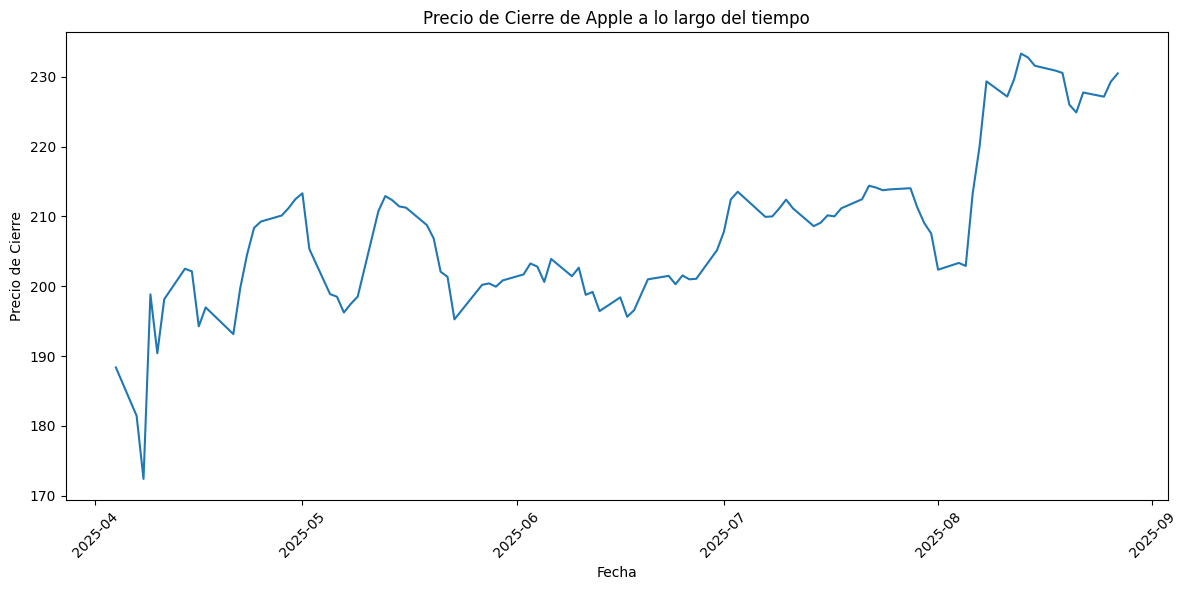

In [5]:
import matplotlib.pyplot as plt

df.index = pd.to_datetime(df.index)

# Convertir columnas numéricas
df = df.astype(float)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'])
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title(f'Precio de Cierre de Apple a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Datos abiertos Colombia

In [20]:
!pip install sodapy

In [22]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

results_dolar = client.get("mcec-87by", limit=2000)

# Convert to pandas DataFrame
dolar_df = pd.DataFrame.from_records(results_dolar)
dolar_df.head()

,valor,unidad,vigenciadesde,vigenciahasta
0,4051.97,COP,2025-08-28T00:00:00.000,2025-08-28T00:00:00.000
1,4044.51,COP,2025-08-27T00:00:00.000,2025-08-27T00:00:00.000
2,4017.44,COP,2025-08-26T00:00:00.000,2025-08-26T00:00:00.000
3,4008.7,COP,2025-08-23T00:00:00.000,2025-08-25T00:00:00.000
4,4034.18,COP,2025-08-22T00:00:00.000,2025-08-22T00:00:00.000


## Interactuar con ChatGPT desde Python

In [8]:
!pip install openai

In [16]:
chat_gpt_key=''

In [19]:
from openai import OpenAI

# Inicializa el cliente
client = OpenAI(api_key=chat_gpt_key)

prompt = "¿Quién es el presidente de Colombia?"

# Llamada al modelo
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt}],
    temperature=0
)

# Extraer contenido
mensaje = response.choices[0].message.content
print(mensaje)

Hasta mi última actualización en octubre de 2023, el presidente de Colombia es Gustavo Petro. Sin embargo, te recomiendo verificar esta información con una fuente actualizada, ya que las situaciones políticas pueden cambiar.
